In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

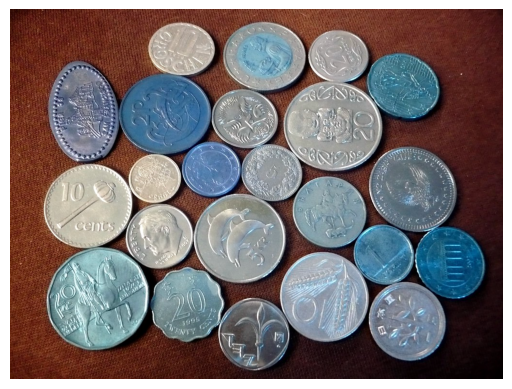

In [2]:
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

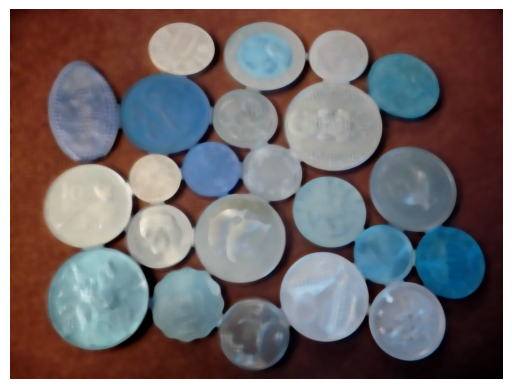

In [3]:
#detaylarini azaltmak icin bluring islemi yapiyoruz
# lpf: blurring
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

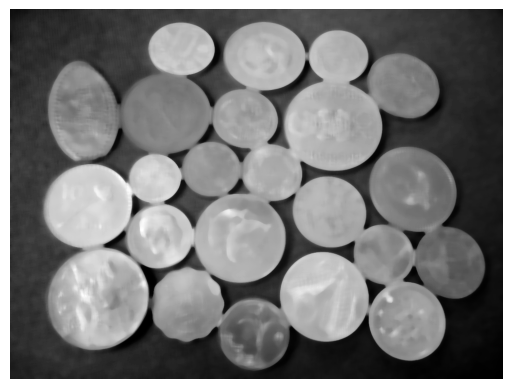

In [4]:
# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

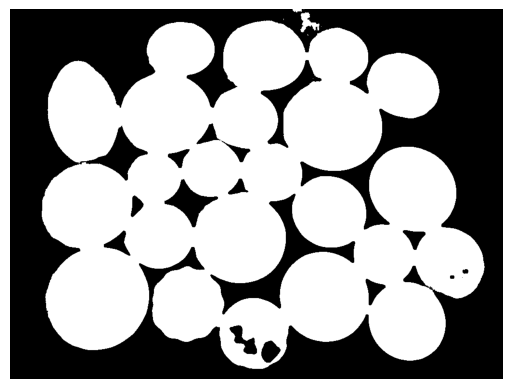

In [5]:
#coinleri komple beyaz arka tarafi komple siyah yapan threshold ekliyoruz.
# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 75, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

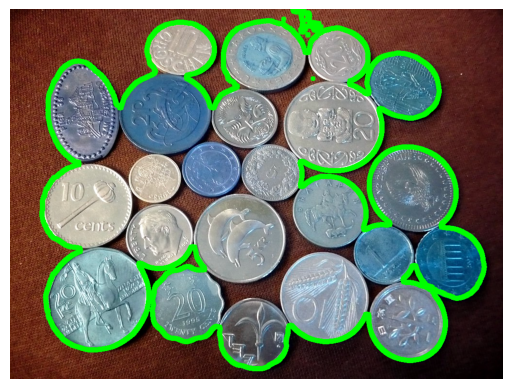

In [6]:
# kontur bazi surumlerde 3 argumanli bazilarinda 2 argumanli, bizim surumde 2 argumanli oldugu icin ilk argumani siliyoruz.
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(0,255,0),10)
plt.figure(),plt.imshow(coin),plt.axis("off")



#suanda kontur islemimiz basarili olmadi cunku guzel bir ayirma islemi yapmadi
#hepsini buyuk bir paraymis gibi aldi ayni onceki kontur isleminde 2 ayni renkten nesneyi yan yana getirince ikisini de 
#alip buyuk bir nesne olarak algilamasi gibi.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

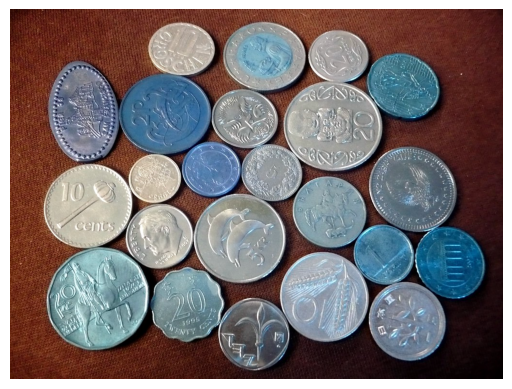

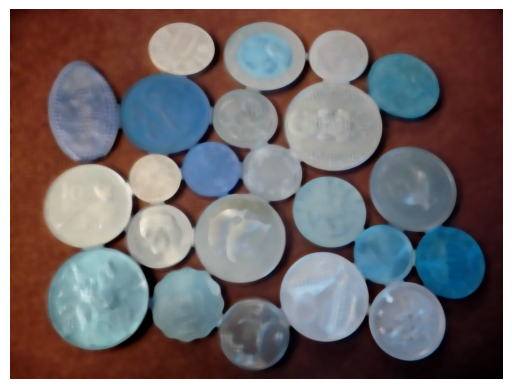

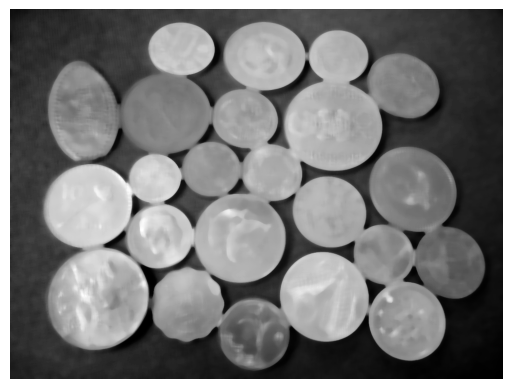

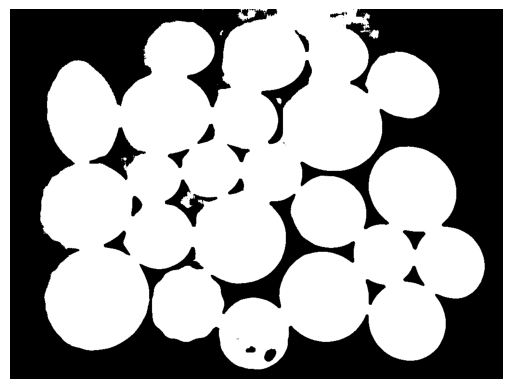

In [8]:
#simdi watershed e yavastan baslayalim.
#onceki yaptigimiz islemleri tekrardan yapalim

# içe aktar
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

# lpf: blurring
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

# binary threshold    burada 65 e 255 yaptik.
ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")


#burada hepsini bir nesne olarak algilamasinin sebebi thresholdda nesneler arasinda baglantilar (kopruler olmasi)
#bizim bunun onune gecmemiz lazim, o yuzden nesneleri kucultursek koprulerin onune gecebiliriz.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

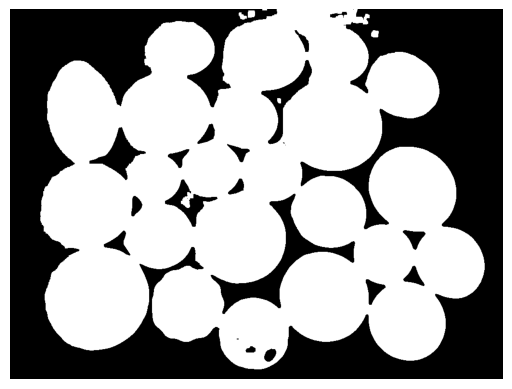

In [9]:
#simdi acilma ve genisleme yapalim, erozyon ve genisleme yapicaz yani.
# açılma
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.figure(), plt.imshow(opening, cmap="gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

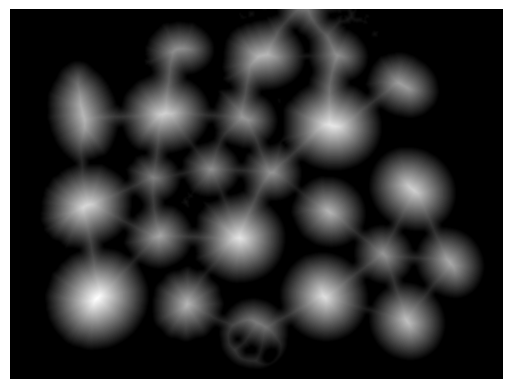

In [10]:
#buradaki kopruler bizim l2 distancelerimiz oluyor. 
#simdi dostanceyi bulduktan sonra ondeki resmin ne oldugunu bulabilmek icin resmi kucultucez, sonra arkaplanin 
#ne oldugunu bulmak icin de resmi buyultucez yani ondeki resimle arkadaki resim arasinda ayristirma islemi yapicaz.
#resim dedigimiz aslinda burdaki nesneler yani paralar.
# nesneler arası distance bulalım
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.figure(), plt.imshow(dist_transform, cmap="gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

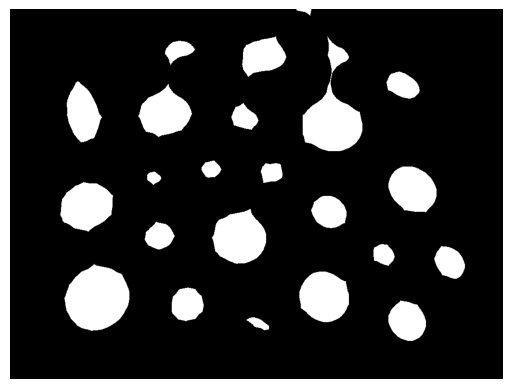

In [11]:
#nesneleri küçült
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform),255,0)
plt.figure(), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off")

#simdi burada yaptigmiz islem max genlik degerini alip o degerin 0.4 unu aldik ve onun altindakileri attik.
#yani maksimum beyaz degerimize gore hareket edip koprulerin beyazligi daha az oldugu icin kopruleri o sayede attik.
#nesnenin beyazligi kopruden daha fazla oldugundan onu kullandik.
#0.4 degeri literaturde gecen bir kavramdir, dihger projelerde optimum deger olarak bu degisebilir.
#aslinda biz burada su doldurma islemi gerceklestirdik, yani bi nevi arkaplana su doldurduk ve nesneler arasi baglantiyi kestik.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

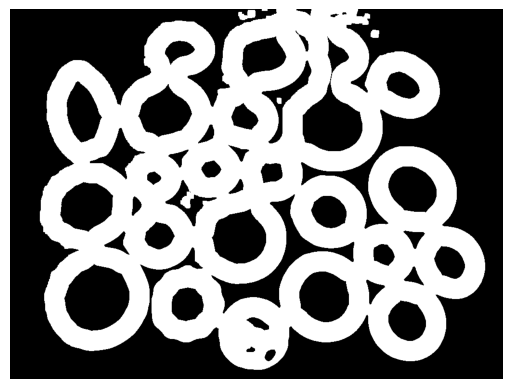

In [12]:
#arka plan için nesneleri büyültuyoruz.
sure_background = cv2.dilate(opening, kernel, iterations = 1)
sure_foreground = np.uint8(sure_foreground)
#arkaplanla on plani birbirinden cikartirsak resmimiz biraz daha belli olur. burada bu ikisinin farkini aldik.
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(), plt.imshow(unknown, cmap="gray"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

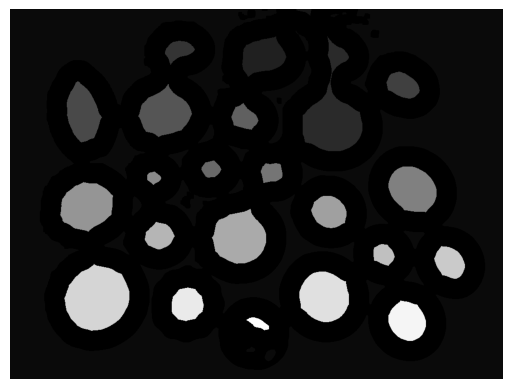

In [13]:
# bağlantı
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

#burada etraflarindaki beyazlari siyahlastirdik.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

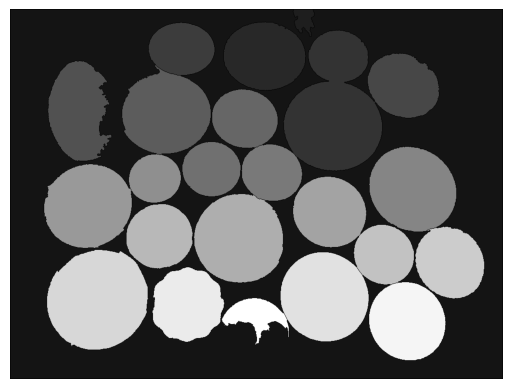

In [14]:
#simdi bunlari havza algoritmasiyle segmente edicez.
marker = cv2.watershed(coin,marker)
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

#nesnelerimiz ortay cikti.
#simdi son yapacgimiz sey burdaki konturlari bulup etrafina cizgileri cizdiricez.

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

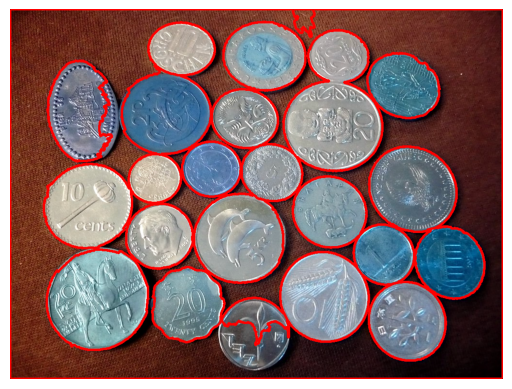

In [15]:
# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.axis("off")